In [460]:
import numpy as np
import math
import random
from random import seed
from random import random
from numpy import linalg as LA

In [461]:
m=500
N=2000

In [462]:
A=np.random.rand(m,N) # measurement matrix
s=2 # sparsity

x =np.zeros((N,1))


In [463]:
import random
randomlist = random.sample(range(0, N-1), 2)
print(randomlist)  # indeces for non zero values

[1691, 1719]


In [464]:
from random import random

for i in randomlist:
    x[i]=random()  

y=A.dot(x)  

A_T=A.transpose()

xn=np.zeros((N,1))
xn1=np.zeros((N,1)) #xn+1


In [465]:
def hard_thresh(x_mat):  # function for hard thresholding
    n=len(x_mat)
    x_mat=np.absolute(x_mat)
    ind=x_mat.argsort(axis=0)
    
    for i in ind:
        if i!=n-1 and i!=n-2:
            
            x_mat[ind[i]]=0
            
    return(x_mat)

In [466]:
tol=0.00001
rel_inc=[] # relative increment for each iteration
it_no=[] # iteration number
residual=[] #residual for iterations
iteration=0


In [467]:
while (iteration<1000):
    
    if np.array_equal(x, xn1, equal_nan=False)==False: # to check if x==xn1
    
    
        #for i in range (len(randomlist)-1):
         #   if x[randomlist[i]]!=xn1[randomlist[i]] and x[randomlist[i+1]]!=xn1[randomlist[i+1]]:



        xn1=xn+(0.001*(A_T.dot((y-(A.dot(xn))))))  # IHT statement to find xn+1
        xn1=hard_thresh(xn1) 

        xn1_xn=[]
        
        for k in range (N):
            xn1_xn.append(xn1[k]-xn[k])   #xn1-xn


        xn1_norm=LA.norm(xn1)  # ||xn1||
        xn1_xn_norm=LA.norm(xn1_xn)  # ||xn1-xn||
        error=xn1_xn_norm/xn1_norm  # (||xn1-xn||) / (||xn1||)
        
        if error<tol:
            rel_inc.append(error)
            it_no.append(iteration)
            
            res=(A.dot(xn1))-y
            res_norm=LA.norm(res)
            residual.append(res_norm)         
            
        xn=xn1
        iteration=iteration+1

In [468]:
for i in randomlist:  # compare values of x and xn1 after final iteration
    print(i)
    print(xn1[i])
    print(x[i])
    print("_____________")

1691
[0.89492429]
[0.89492429]
_____________
1719
[0.826816]
[0.826816]
_____________


In [469]:
import matplotlib.pyplot as plt

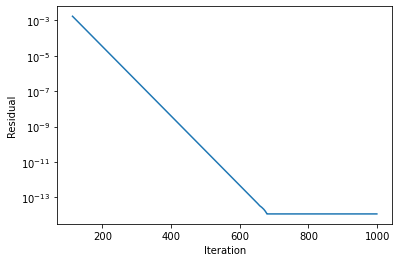

In [470]:
plt.plot(it_no,residual)  # plot of residual for each iteration
plt.xlabel("Iteration")
plt.ylabel("Residual")
plt.yscale('log')

Text(0, 0.5, 'Residual')

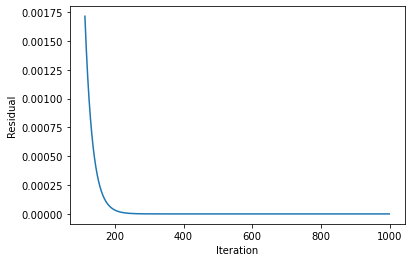

In [471]:
plt.plot(it_no,residual)  # plot of residual for each iteration
plt.xlabel("Iteration")
plt.ylabel("Residual")

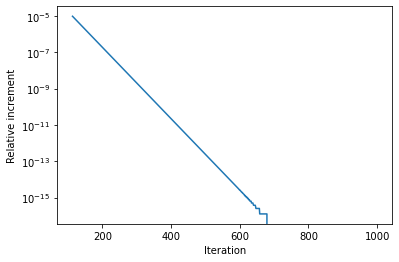

In [472]:
plt.plot(it_no,rel_inc)  # plot of relative increment for each iteration
plt.xlabel("Iteration")
plt.ylabel("Relative increment")
plt.yscale('log')

Text(0, 0.5, 'Relative increment')

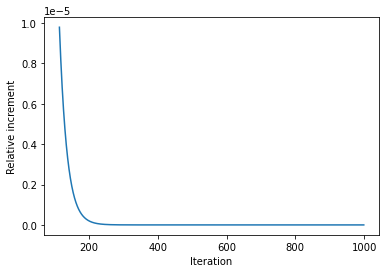

In [473]:
plt.plot(it_no,rel_inc)  # plot of relative increment for each iteration
plt.xlabel("Iteration")
plt.ylabel("Relative increment")